In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
data=pd.read_csv("signal.csv",index_col=0)

In [3]:
data

,signal,ret,cumsum
2016-12-15,-0.014380,0.000104,0.000104
2016-12-19,-0.012308,-0.011125,-0.011021
2015-04-16,-0.011630,0.000072,-0.010949
2017-02-03,-0.009918,-0.000761,-0.011709
2015-06-01,-0.007005,0.003015,-0.008695
...,...,...,...
2020-04-07,0.009082,-0.001477,-0.144040
2015-06-16,0.009332,0.001077,-0.142963
2015-10-09,0.009408,0.002818,-0.140145
2016-12-16,0.010620,0.000559,-0.139586


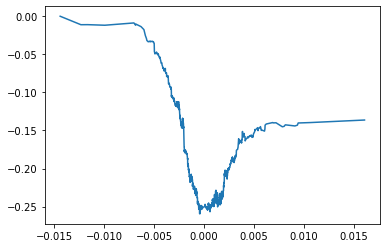

In [17]:
plt.plot(data['signal'],data['cumsum'])

In [7]:
data['k1']=data['cumsum'].div(range(1,len(data)+1))
data['k1']=data['cumsum'].div(range(1,len(data)+1))

<AxesSubplot:>

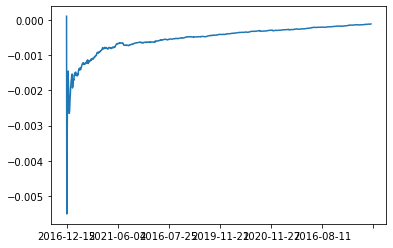

In [9]:
data['k1'].plot()

In [12]:
import piecewise_regression
a=piecewise_regression.Fit(list(data['signal']),list(data['cumsum']),n_breakpoints=2)
a.summary()


                    Breakpoint Regression Results                     
No. Observations                     1191
No. Model Parameters                    6
Degrees of Freedom                   1185
Res. Sum of Squares              0.188946
Total Sum of Squares              3.68979
R Squared                        0.948792
Adjusted R Squared               0.948533
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0788784      0.00512      -15.413      5.43e-49    -0.088919    -0.068838
alpha1              -6.82535        0.853      -7.9991      2.96e-15      -8.4994      -5.1513
beta1               -51.1677         1.06      -48.419             -      -53.241      -49.094
beta2                 76.356          0.7       109.01             -       74.982        77.73
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                     1191\nNo. Model Parameters                    6\nDegrees of Freedom                   1185\nRes. Sum of Squares              0.188946\nTotal Sum of Squares              3.68979\nR Squared                        0.948792\nAdjusted R Squared               0.948533\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst             -0.0788784      0.00512      -15.413      5.43e-49    -0.088

In [26]:
import piecewise_regression
a=piecewise_regression.Fit(list(data['signal']),list(data['cumsum']),n_breakpoints=2)
a.summary()


                    Breakpoint Regression Results                     
No. Observations                     1191
No. Model Parameters                    6
Degrees of Freedom                   1185
Res. Sum of Squares              0.188946
Total Sum of Squares              3.68979
R Squared                        0.948792
Adjusted R Squared               0.948533
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0788784      0.00512      -15.413      5.43e-49    -0.088919    -0.068838
alpha1              -6.82535        0.853      -7.9991      2.96e-15      -8.4994      -5.1513
beta1               -51.1677         1.06      -48.419             -      -53.241      -49.094
beta2                 76.356          0.7       109.01             -       74.982        77.73
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                     1191\nNo. Model Parameters                    6\nDegrees of Freedom                   1185\nRes. Sum of Squares              0.188946\nTotal Sum of Squares              3.68979\nR Squared                        0.948792\nAdjusted R Squared               0.948533\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst             -0.0788784      0.00512      -15.413      5.43e-49    -0.088

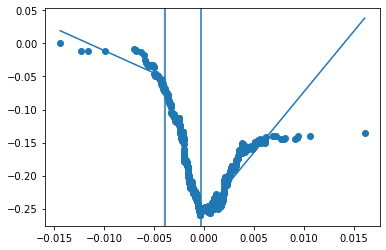

In [27]:
a.plot()

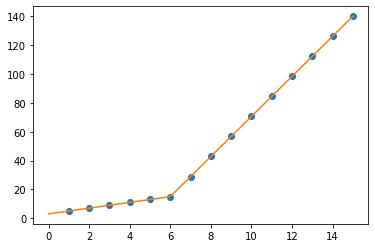

In [13]:


from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0, x >= x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

In [14]:
p

array([ 5.9981956 , 14.9963912 ,  2.        , 13.89012121])

In [35]:

from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

x = np.array(data['signal'])
y = np.array(data['cumsum'])

def piecewise_linear(x, x1,x2,y0,k1,k2):
    return np.piecewise(x, [x < x1, np.logical_and(x >= x1, x < x2),x>=x2], [lambda x:k1*x + y0-k1*x1,lambda x:x*0+y0, lambda x:k2*x + y0-k2*x2])

p , e = optimize.curve_fit(piecewise_linear, x, y,bounds=([np.min(data['signal']),0,-np.inf,-np.inf,0],[0,np.max(data['signal']),np.inf,0,np.inf]))


In [38]:
p

array([-8.04295253e-18,  4.57156195e-04, -2.48537084e-01, -3.84556501e+01,
        1.85413525e+01])

array([[inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf]])

In [16]:
def piecewise_linear(x, x1,x2,y0,k1,k2):
    return np.piecewise(x, [x < x1, x1<=x<=x2,x>x2], [lambda x:k1*x + y0-k1*x1,lambda x:y0, lambda x:k2*x + y0-k2*x2])


In [ ]:
import piecewise_regression
a=piecewise_regression.Fit(list([np.linspace(-100,1000,200)]),list(),n_breakpoints=2)
a.summary()

In [22]:
x=np.linspace(-100,100,200)
y=[i*i+np.random.rand() for i in x]

In [23]:
a=piecewise_regression.Fit(x,y,n_breakpoints=2)
a.summary()


                    Breakpoint Regression Results                     
No. Observations                      200
No. Model Parameters                    6
Degrees of Freedom                    194
Res. Sum of Squares           2.23756e+07
Total Sum of Squares          1.81359e+09
R Squared                        0.987662
Adjusted R Squared               0.987279
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -4167.28     1.53e+02      -27.264      2.83e-68      -4468.7      -3865.8
alpha1              -134.675         2.18      -61.681     1.99e-129      -138.98      -130.37
beta1                 133.67         3.05       43.775             -       127.65       139.69
beta2                134.673         3.02        44.61             -       128.72       140.63
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                      200\nNo. Model Parameters                    6\nDegrees of Freedom                    194\nRes. Sum of Squares           2.23756e+07\nTotal Sum of Squares          1.81359e+09\nR Squared                        0.987662\nAdjusted R Squared               0.987279\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -4167.28     1.53e+02      -27.264      2.83e-68      -446

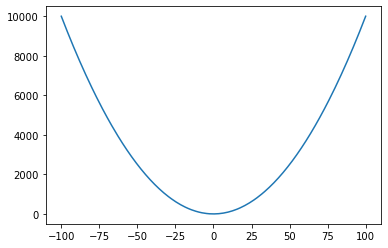

In [24]:
plt.plot(x,y)

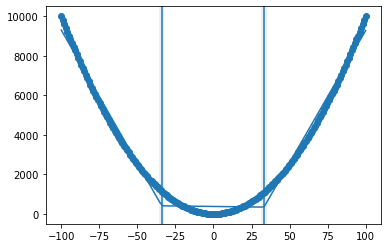

In [25]:
a.plot()

In [39]:
weight_df_3=pd.read_csv("weight_df_3.csv",index_col=0)
ret_df_3=pd.read_csv("ret_df_3.csv",index_col=0)

def piece_wise_reg_signal_graph(x, y):
    def piecewise_linear(x, x1, x2, y0, k1, k2):
        return np.piecewise(x, [x < x1, np.logical_and(x >= x1, x < x2), x >= x2],
                            [lambda x: k1 * x + y0 - k1 * x1, lambda x: x * 0 + y0, lambda x: k2 * x + y0 - k2 * x2])

    param, _ = optimize.curve_fit(piecewise_linear, x, y,
                                  bounds=([np.min(x), 0, -np.inf, -np.inf, 0], [0, np.max(x), np.inf, 0, np.inf]))
    return param

long_threshold=weight_df_3.copy()
short_threshold=weight_df_3.copy()

for j in range(len(weight_df_3.columns)):
    for i in range(len(weight_df_3)):
        if i<100:
            long_threshold.iloc[i,j]=0
            short_threshold.iloc[i,j]=0
        else:
            df=pd.concat([weight_df_3.iloc[:i,j],ret_df_3.iloc[:i,j]],axis=1)
            df.columns=['signal','ret']
            df=df.dropna()
            if len(df)<100:
                long_threshold.iloc[i, j] = 0
                short_threshold.iloc[i, j] = 0
            else:
                try:
                    df=df.sort_values(['signal'])
                    df['cumpnl']=df['ret'].cumsum()
                    x=np.array(df['signal'])
                    y=np.array(df['cumpnl'])
                    piecewise_result=piece_wise_reg_signal_graph(x, y)
                    long_threshold.iloc[i, j] = piecewise_result[0]
                    short_threshold.iloc[i, j] = piecewise_result[1]
                except:
                    long_threshold.iloc[i, j] = 0
                    short_threshold.iloc[i, j] = 0
        print(f"{i}/{len(weight_df_3)} {j} is ok")





0/1926 0 is ok
1/1926 0 is ok
2/1926 0 is ok
3/1926 0 is ok
4/1926 0 is ok
5/1926 0 is ok
6/1926 0 is ok
7/1926 0 is ok
8/1926 0 is ok
9/1926 0 is ok
10/1926 0 is ok
11/1926 0 is ok
12/1926 0 is ok
13/1926 0 is ok
14/1926 0 is ok
15/1926 0 is ok
16/1926 0 is ok
17/1926 0 is ok
18/1926 0 is ok
19/1926 0 is ok
20/1926 0 is ok
21/1926 0 is ok
22/1926 0 is ok
23/1926 0 is ok
24/1926 0 is ok
25/1926 0 is ok
26/1926 0 is ok
27/1926 0 is ok
28/1926 0 is ok
29/1926 0 is ok
30/1926 0 is ok
31/1926 0 is ok
32/1926 0 is ok
33/1926 0 is ok
34/1926 0 is ok
35/1926 0 is ok
36/1926 0 is ok
37/1926 0 is ok
38/1926 0 is ok
39/1926 0 is ok
40/1926 0 is ok
41/1926 0 is ok
42/1926 0 is ok
43/1926 0 is ok
44/1926 0 is ok
45/1926 0 is ok
46/1926 0 is ok
47/1926 0 is ok
48/1926 0 is ok
49/1926 0 is ok
50/1926 0 is ok
51/1926 0 is ok
52/1926 0 is ok
53/1926 0 is ok
54/1926 0 is ok
55/1926 0 is ok
56/1926 0 is ok
57/1926 0 is ok
58/1926 0 is ok
59/1926 0 is ok
60/1926 0 is ok
61/1926 0 is ok
62/1926 0 is ok
63

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

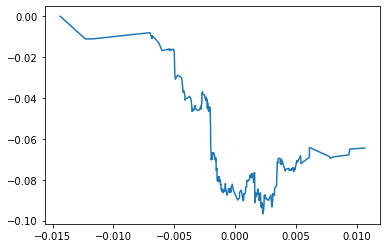

In [42]:
plt.plot(df['signal'],df['cumpnl'])